In [1]:
import fenics as fn
import numpy as np
#
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

PDE problem
$$u_t + (4-u)u_x = 0,\quad (x,y,t)\in (0,1)\times(0,1)\times(0,T)$$
$$u=0,\quad x =0$$
$$u=1,\quad x =1$$
$$u(x,y,0) = u_0(x,y)=x$$

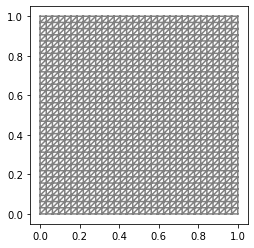

In [2]:
N = 32
mesh = fn.UnitSquareMesh(N,N)
fn.plot(mesh)
plt.show()

In [3]:
#parameters
f   = fn.Constant(0.0) 
tau = 0.005
T   = 1.

In [4]:
Uh = fn.FunctionSpace(mesh,'CG',1)
print(Uh.dim())

1089


In [5]:
v  = fn.TestFunction(Uh)
u = fn.TrialFunction(Uh)

In [6]:
u_ini = fn.Expression('x[0]',degree=1)

Variational formulation
$$\int_{\Omega} \left(u^{k+1} + \tau(4 - u^{k})u^{k+1}_x\right)\left(v + \tau(4 - u^{k})v_x\right) = \int_{\Omega} \left(u^{k} + \tau f^{k+1}\right)\left(v + \tau(4 - u^{k})v_x\right)$$

In [7]:
u0 = fn.Function(Uh)
u0.assign(u_ini)
# LSQ
B = (u + tau*(4 - u0)*u.dx(0))*(v + tau*(4 - u0)*v.dx(0))*(fn.dx)
L = (u0 + tau*f)*(v + tau*(4 - u0)*v.dx(0))*(fn.dx)

In [8]:
# Boundary condition
g1 = fn.Constant(0.)
g2 = fn.Constant(1.)
#
bc1 = fn.DirichletBC(Uh,g1,'x[0]<DOLFIN_EPS')
bc2 = fn.DirichletBC(Uh,g2,'abs(1 - x[0])<DOLFIN_EPS')
bc = [bc1,bc2]

In [9]:
fn.set_log_level(30)

In [10]:
u_sol = fn.Function(Uh)

time_step = 0.
while time_step <= T:
    fn.solve(B == L, u_sol, bc)
    #u0.vector()[:] = u_sol.vector()[:]  
    u0.assign(u_sol)
    time_step += tau

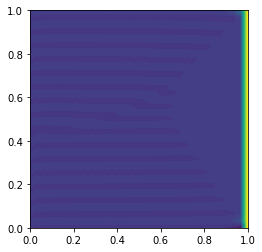

In [11]:
fn.plot(u_sol)
plt.show()

In [12]:
X,Y = np.meshgrid(np.linspace(0,1,2*N+1),np.linspace(0,1,2*N+1))
U   = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        U[i,j] = u_sol(X[i,j],Y[i,j])

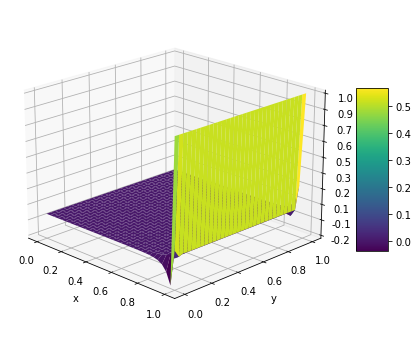

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis,
                       linewidth=0.1, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.01f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#
ax.view_init(elev=20., azim=-45.)

plt.savefig('example_01.png', dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, 
            bbox_inches='tight', pad_inches=0.1, metadata=None)